In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras. metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix 
import itertools
import os 
import shutil
import random
import glob
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Data prepration 

In [2]:
os.chdir('C:\\Users\\akish\\Downloads\\train')

In [3]:
if os.path.isdir('train\\dog') is False:
    os.makedirs('train\\dog')
    os.makedirs('train\\cat')
    os.makedirs('valid\\dog')
    os.makedirs('valid\\cat')
    os.makedirs('test\\dog')
    os.makedirs('test\\cat')

In [4]:
[x[0] for x in os.walk(os.getcwd())]

['C:\\Users\\akish\\Downloads\\train',
 'C:\\Users\\akish\\Downloads\\train\\test',
 'C:\\Users\\akish\\Downloads\\train\\test\\cat',
 'C:\\Users\\akish\\Downloads\\train\\test\\dog',
 'C:\\Users\\akish\\Downloads\\train\\train',
 'C:\\Users\\akish\\Downloads\\train\\train\\cat',
 'C:\\Users\\akish\\Downloads\\train\\train\\dog',
 'C:\\Users\\akish\\Downloads\\train\\valid',
 'C:\\Users\\akish\\Downloads\\train\\valid\\cat',
 'C:\\Users\\akish\\Downloads\\train\\valid\\dog']

In [5]:
for i in random.sample(glob.glob('cat*'), 500):
    shutil.move(i, 'train\\cat')      
for i in random.sample(glob.glob('dog*'), 500):
    shutil.move(i, 'train\\dog')
for i in random.sample(glob.glob('cat*'), 100):
    shutil.move(i, 'valid\\cat')        
for i in random.sample(glob.glob('dog*'), 100):
    shutil.move(i, 'valid\\dog')
for i in random.sample(glob.glob('cat*'), 50):
    shutil.move(i, 'test\\cat')      
for i in random.sample(glob.glob('dog*'), 50):
    shutil.move(i, 'test\\dog')


In [6]:
os.chdir('C:\\Users\\akish\\Documents\\deeplearning')

In [7]:
os.getcwd()

'C:\\Users\\akish\\Documents\\deeplearning'

In [8]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'CNN with keras.ipynb',
 'CVwithPyTorch.ipynb',
 'data organization for CNN.ipynb',
 'keras sequential model.ipynb',
 'Keras.ipynb',
 'models',
 'predicting and saving models using keras.ipynb',
 'PytorchWorkingwithDatasets.ipynb',
 'pytorch_intro.ipynb',
 'readme.md']

In [9]:
path = "C:\\Users\\akish\\Downloads\\train\\"
train_path = path + "train"
valid_path = path + "valid"
test_path = path + "test"

In [10]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224),classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.


In [11]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224),classes=['cat', 'dog'], batch_size=10)

Found 200 images belonging to 2 classes.


In [12]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224),classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 100 images belonging to 2 classes.


In [13]:
img, labels = next(train_batches)

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

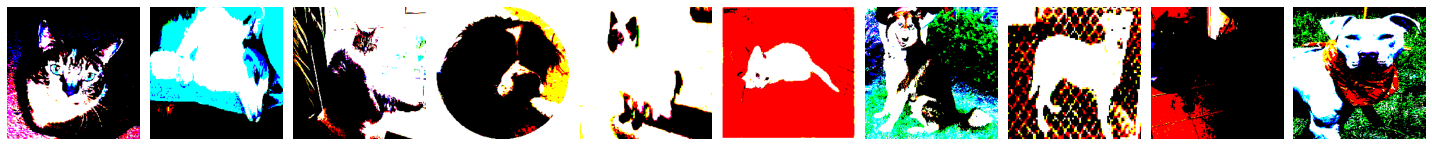

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [14]:
plot_images(img)
print(labels)

In [16]:
assert train_batches.n == 1000

# Build a CNN

In [17]:
model = Sequential([
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides= 2),
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides= 2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 63s - loss: 13.6675 - accuracy: 0.5780 - val_loss: 3.8485 - val_accuracy: 0.5900
Epoch 2/10
100/100 - 35s - loss: 2.0175 - accuracy: 0.7700 - val_loss: 2.5334 - val_accuracy: 0.6900
Epoch 3/10
100/100 - 35s - loss: 0.3823 - accuracy: 0.9170 - val_loss: 3.0560 - val_accuracy: 0.6750
Epoch 4/10
100/100 - 35s - loss: 0.1870 - accuracy: 0.9580 - val_loss: 2.9627 - val_accuracy: 0.6700
Epoch 5/10
100/100 - 34s - loss: 0.0633 - accuracy: 0.9780 - val_loss: 2.5031 - val_accuracy: 0.6450
Epoch 6/10
100/100 - 35s - loss: 0.0459 - accuracy: 0.9810 - val_loss: 2.2206 - val_accuracy: 0.7150
Epoch 7/10
100/100 - 34s - loss: 0.0068 - accuracy: 0.9980 - val_loss: 2.4108 - val_accuracy: 0.6850
Epoch 8/10
100/100 - 33s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.3924 - val_accuracy: 0.7050
Epoch 9/10
100/100 - 33s - loss: 5.4301e-04 - accuracy: 1.0000 - val_loss: 2.3793 - val_accuracy: 0.7000
Epoch 10/10
100/100 - 33s - loss: 4.2240e-04 - accuracy: 1.0000 - val_loss: 2.3724 - v